In [4]:
%matplotlib inline
from matplotlib.legend_handler import HandlerLine2D
import sys
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from IPython.display import display
from at2019dsg.plotting import fig_width, fig_height, plot_dir, dpi, golden_ratio
from at2019dsg.plotting import ed_big_fontsize as big_fontsize
from at2019dsg.data import data_dir

In [5]:
def getLCdata(lc,ts=0.):

    if not ts>-10: ts=25
    
    """ --  reading the LC output --- """
    s=lc.split('/')
    src=s[-1].split('_lightcurve*.npy')[0]
    o = np.load(lc,allow_pickle=True, encoding="bytes").flat[0]
    _ts = o[b'ts']
    mjd=o[b'tmin_mjd']
    mjd_max = o[b'tmax_mjd']
    mjd_width = []
    for ii in range(len(mjd)):
        mjd_width.append(mjd_max[ii]-mjd[ii])
    
    mjd_middle= np.array(mjd)+ np.array(mjd_width)*0.5
    flux=o[b'flux']
    flux_err=o[b'flux_err']
    ul = o[b'flux_ul95']
    N_pred=o[b'npred']
    bin_qual= o[b'fit_quality']

    condition= _ts<ts  
    
  
    y = [ (ul[i] if condition[i] else flux[i]) for i in range(len(mjd_middle)) ]
    ye =[ (np.array(flux_err).mean()  if condition[i] else flux_err[i]) for i in range(len(mjd_middle)) ]
    npred=[ ( 0 if condition[i] else N_pred[i]) for i in range(len(mjd_middle)) ]
    
    
    bins_num = o[b'param_names'].shape[0]
    
    pl_idx = []
    pl_idx_err = []
    
    
    

    return src,mjd_middle, np.array(mjd_width), y, ye, ul, npred, bin_qual, condition,pl_idx,pl_idx_err,_ts


def plotLC(lc, ts=9, where='', save=False):
    
    f, axarr = plt.subplots(1, sharex=True, figsize=(fig_width, fig_width/golden_ratio), dpi=dpi)
    
    f_scale_label=''

    axarr.set_ylabel('Flux [10$^{-7}$ ph cm$^{-2}$ s$^{-1}$]', fontsize = big_fontsize)
    axarr.set_xlabel('Time [MJD]',fontsize = big_fontsize)
    src,mjd_middle, mjd_width, flux, fluxerr, ul, N_pred,bin_qual, lolims, pl_idx,pl_idx_err,_ts = getLCdata(lc,ts=ts)
    
    axarr.axes.get_xaxis().set_visible(True)
    axarr.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    mjd_beg = mjd_middle[0] - mjd_width[0]
    mjd_end = mjd_middle[len(mjd_middle)-1] + mjd_width[len(mjd_middle)-1]
    axarr.set_xlim(mjd_beg,mjd_end)
    axarr.set_ylim(0.0, 1.7)
#     plt.gca().set_ylim(bottom=0.0)
    
    axarr.errorbar(mjd_middle,np.array(flux)*1e7, xerr=mjd_width/2., yerr=np.array(fluxerr)*1e7, uplims=lolims,
              color='C0',marker='s',markersize=3.,ls='none',label = r'Fermi-LAT',lw = 1.,capthick = 2,capsize = 6)
    
    axarr.axvline(x=58757, color = 'C1',ls='--')
    axarr.tick_params(axis='both', which='major', labelsize=big_fontsize)

    
#     f.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    
    plt.title('Fermi-J2113.8+1120',fontsize = big_fontsize)
    if save:
        plt.savefig(os.path.join(plot_dir, 'extended_data_figure_5_lat_lightcurve.jpg'),transparent=False,bbox_inches='tight')

    plt.show()

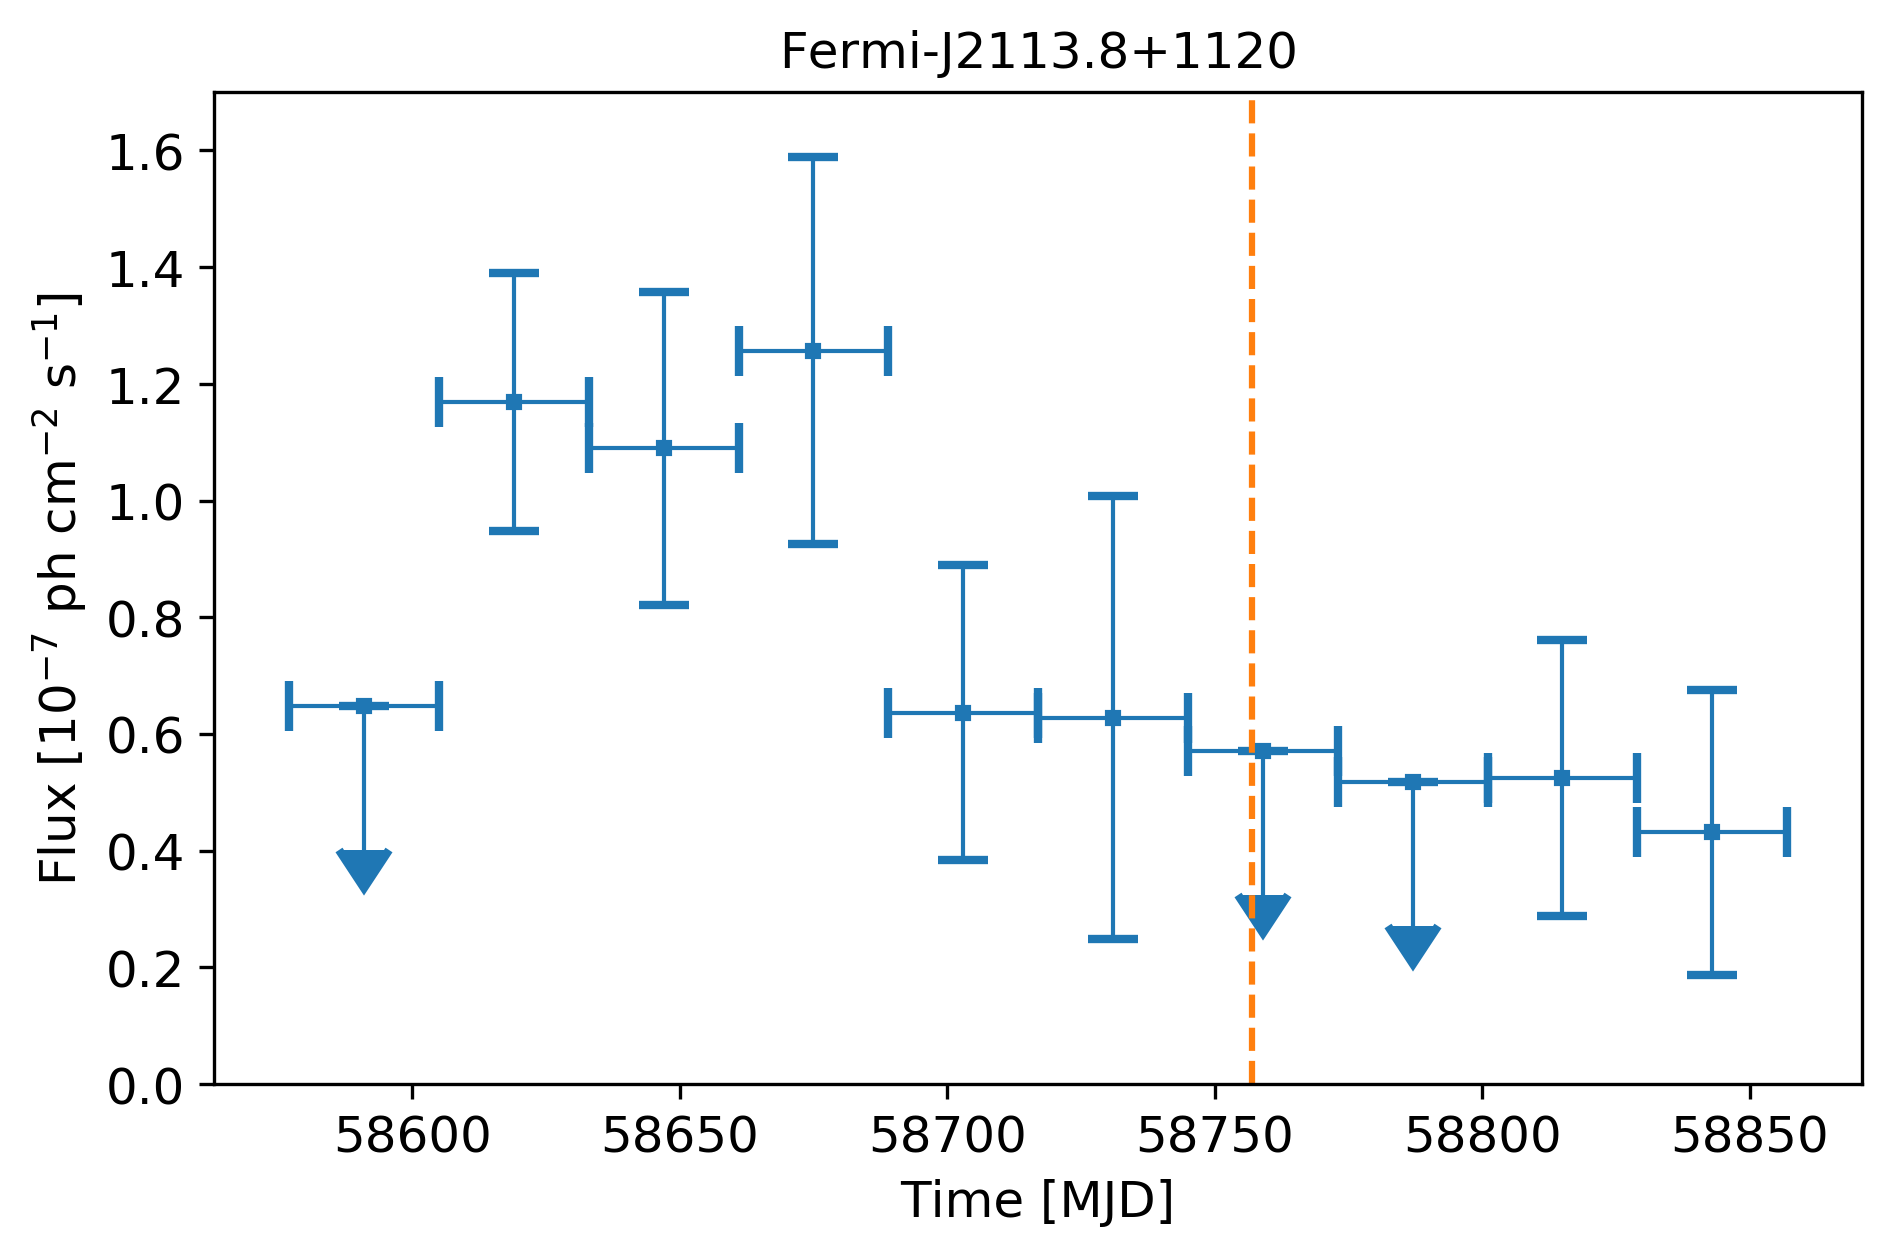

In [6]:
lc_list = glob.glob(os.path.join(data_dir, 'ps_j2113.8+1120_lightcurve.npy'))

for item in lc_list:
    plotLC(item,ts=9.,save=True)
    